# Acceleration notebook

In [11]:
import functions
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

tmax = 500
L = 500
N = 100
# N = 75
vmax = 5
p = 0.2
acccelerations = [1, 2, 3, 4]

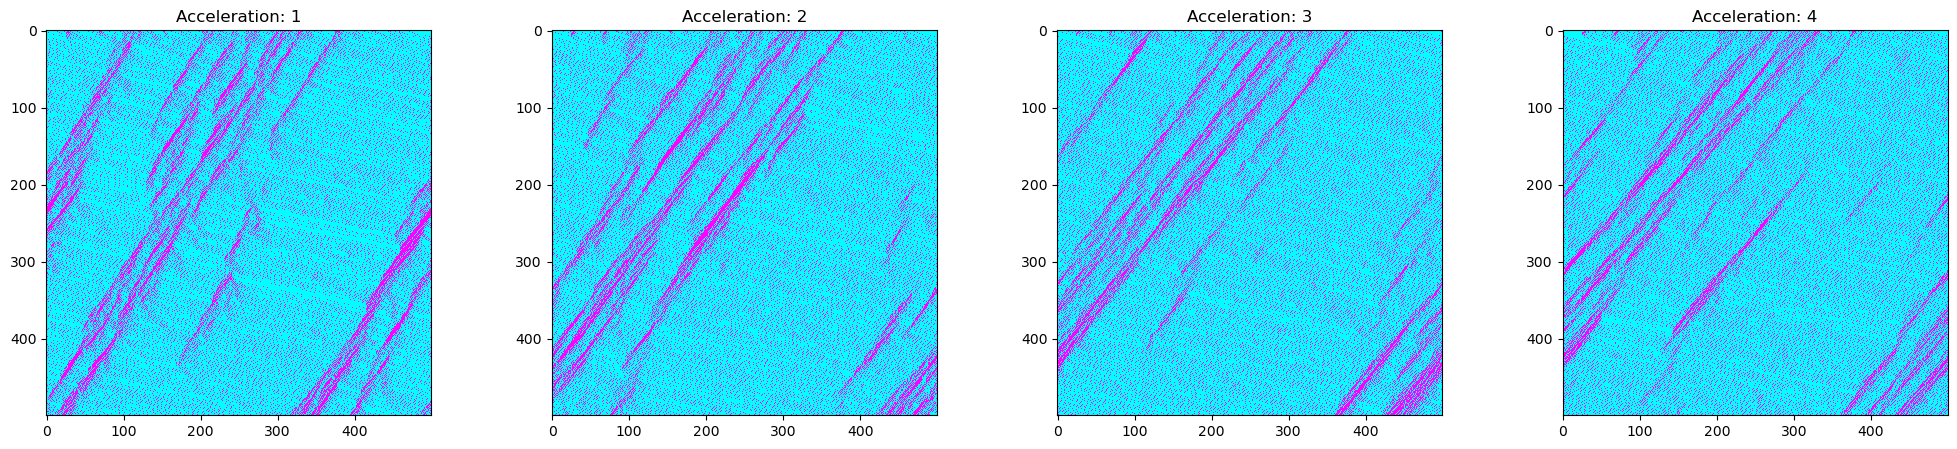

In [7]:
fig, axs = plt.subplots(1,len(acccelerations), figsize = (25, 5))
for accel in acccelerations:
    simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax, max_acceleration=accel)
    simulation.run_model()
    points = np.zeros((tmax, L))
    for i in range(L):
        for j in range(tmax):
            if simulation.positions[j][i] > -1:
                points[j][i] = 1
            else:
                points[j][i] = 0
    axs[acccelerations.index(accel)].set_title(f'Acceleration: {accel}')
    axs[acccelerations.index(accel)].imshow(points, cmap = "cool", interpolation = "nearest")
plt.show()

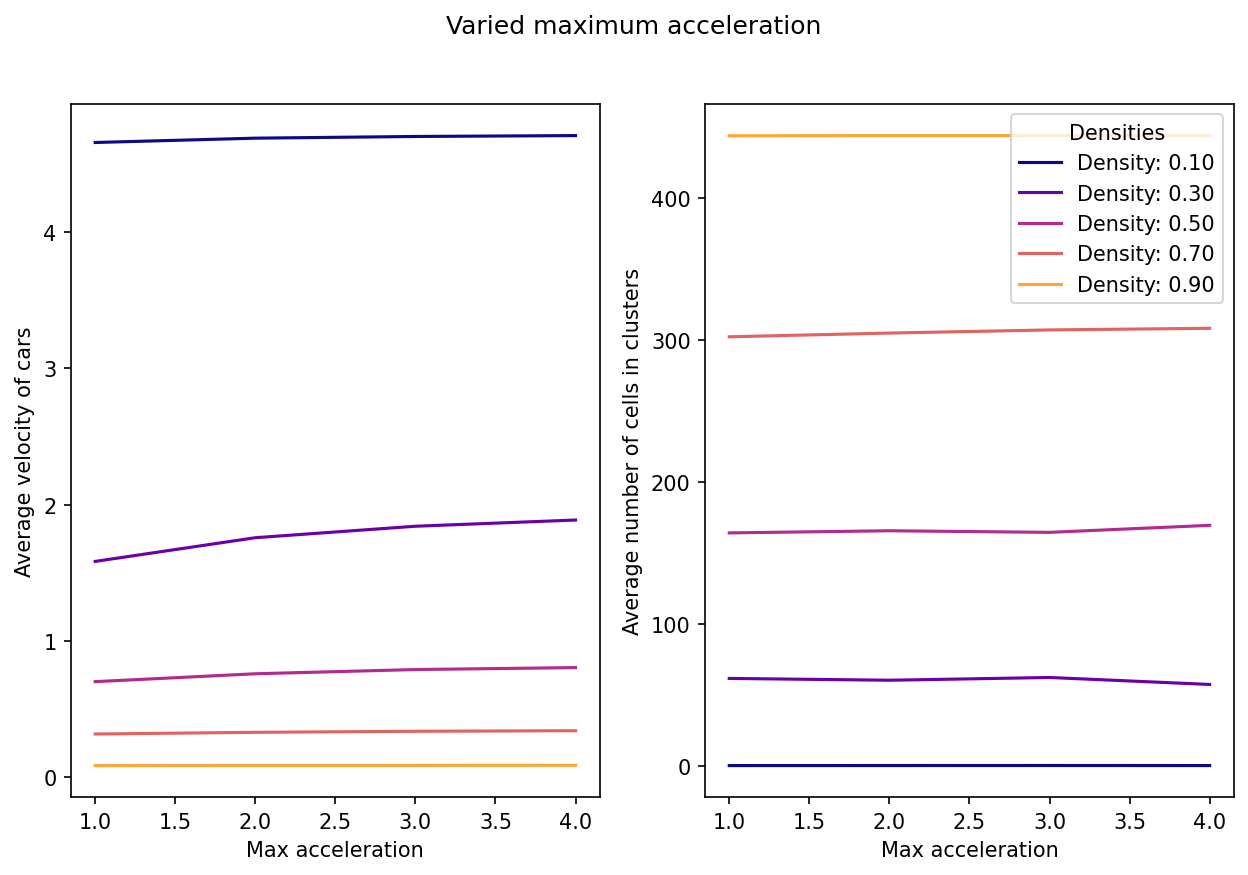

In [12]:
maximum_acceleration = np.arange(1, 5, 1)
densities = np.linspace(0.1, 0.9, 5)

velocity_averages = []
average_cells_in_clusters_per_density = []


for a in maximum_acceleration:
    for density in densities:
        
        simulation = functions.Nagel_Schreckenberg(L, int(L * density), vmax, p, tmax, max_acceleration = a)
        simulation.run_model()
        # Velocity calculations
        velocity_average = simulation.average_velocity()
        velocity_averages.append(velocity_average)

        # Cells in clusters calculations
        cells_in_clusters_list = simulation.clusters()[0]
        cells_cluster_average = np.mean(cells_in_clusters_list) 
        average_cells_in_clusters_per_density.append(cells_cluster_average)

        
# Reshape velocity_averages to match the shape of max_acceleration and densities
velocity_averages = np.array(velocity_averages).reshape(len(maximum_acceleration), len(densities))
average_cells_in_clusters_per_density = np.array(average_cells_in_clusters_per_density).reshape(len(maximum_acceleration), len(densities))


# Plotting
fig, axs = plt.subplots(1,2, dpi=150, figsize = (10,6))

for i in range(len(densities)): # For each density
    colour = plt.cm.plasma(i / float(len(densities))) # Plotting the lines with gradients of colour

    axs[0].plot(maximum_acceleration, velocity_averages[:, i], color=colour, label=f'Density: {densities[i]:.2f}')
    axs[1].plot(maximum_acceleration, average_cells_in_clusters_per_density[:, i], color=colour, label=f'Density: {densities[i]:.2f}')

axs[0].set_xlabel('Max acceleration')
axs[0].set_ylabel('Average velocity of cars')
axs[1].set_xlabel('Max acceleration')
axs[1].set_ylabel('Average number of cells in clusters')
plt.suptitle('Varied maximum acceleration')
plt.legend(title='Densities')
plt.show()

The left graph shows that a higher acceleration doesn't help much in improving the overall speed in our model. 

The right graph shows that the number of cars stuck in traffic doesn't improve either with a higher acceleration.

However, the above CA plots show that the clusters of traffic seem to dissapear as max acceleration increases. But from these two graphs we can conclude that the clusters probably just spread out more and become more homogeneous. However the average number of cars in traffic remains the same and the average speed as well. 

# Do we need this below? NO

In [ ]:
# for accel in acccelerations:
#     cluster_distribution = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax, max_acceleration=accel)[1]
#     x = np.arange(min(cluster_distribution), max(cluster_distribution))

#     # Plotting
#     plt.hist(cluster_distribution, bins = len(x), align = 'left', edgecolor = 'black', linewidth = 1.2)
#     plt.xlabel('Cluster size')
#     plt.ylabel('Frequency')
#     plt.show()

In [9]:
# cluster_averages = []

# for accel in acccelerations:
#     cluster_list = simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax, max_acceleration=accel)[1]
#     cluster_average = np.mean(cluster_list)
#     cluster_averages.append(cluster_average)

# # Plotting
# plt.plot(acccelerations, cluster_averages)
# plt.xlabel('Acceleration')
# plt.ylabel('Average number of cells in clusters')
# plt.title('Average cells in cluster vs acceleration')
# plt.show()